<a href="https://colab.research.google.com/github/MarcosRomano13/Data-Science-II/blob/main/Notebook_Data_Science_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensiones iniciales: (1341, 15)
   Rank                      Name Release Date Platform         Genre  \
0     1                Wii Sports   2006-11-19      Wii        Sports   
1     2         Super Mario Bros.   1985-09-13      NES      Platform   
2     3            Mario Kart Wii   2008-04-10      Wii        Racing   
3     4         Wii Sports Resort   2009-06-25      Wii        Sports   
4     5  Pokemon Red/Pokemon Blue   1996-02-27       GB  Role-Playing   

  Publisher   Developer  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0  Nintendo    Nintendo     41.49     29.02      3.77         8.46   
1  Nintendo    Nintendo     29.08      3.58      6.81         0.77   
2  Nintendo    Nintendo     15.85     12.88      3.79         3.31   
3  Nintendo    Nintendo     15.75     11.01      3.28         2.96   
4  Nintendo  Game Freak     11.27      8.89     10.22         1.00   

   Global_Sales  Critic_Score  User_Score ESRB_Rating  
0         82.74          76.0        80.0         

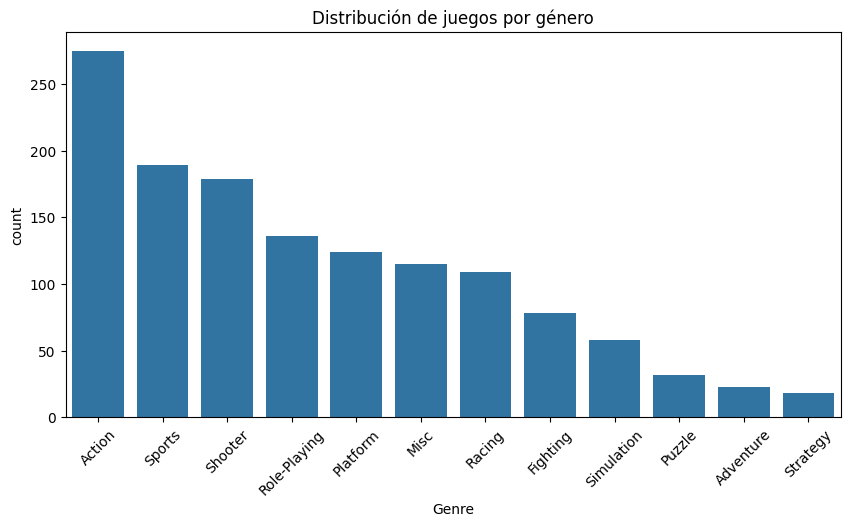

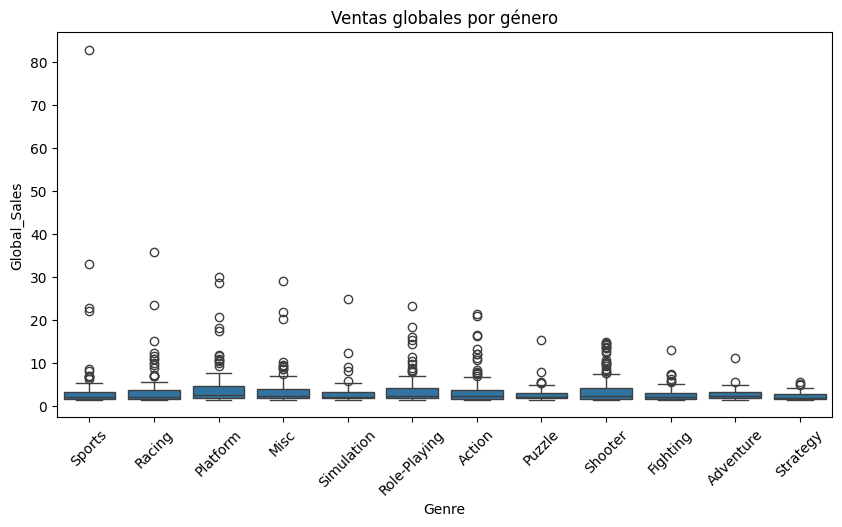

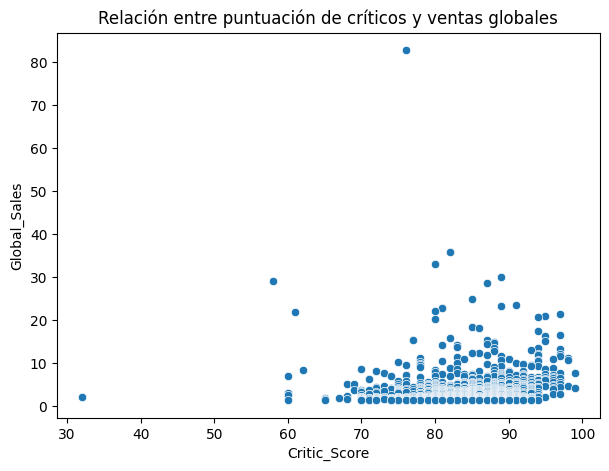

Regresión Lineal
MSE: 5.858157673874402
R²: 0.041313690080610366

Random Forest Regressor
MSE: 6.208482361724759
R²: -0.016016873718776026

Random Forest Classifier
Accuracy: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       268

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


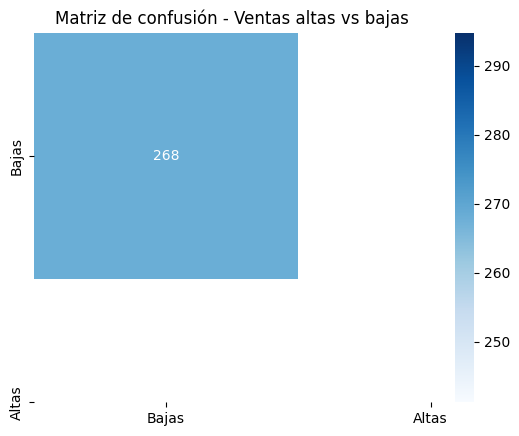

'\nConclusiones preliminares:\n\n- La relación entre las calificaciones de críticos/usuarios y las ventas es positiva,\n  pero débil: muchos factores externos (marketing, franquicias, exclusividad) afectan las ventas.\n- Los modelos de regresión tienen bajo poder predictivo (R² cercano a 0),\n  pero Random Forest muestra una ligera mejora respecto a la regresión lineal.\n- El modelo de clasificación logra predecir de manera razonable si un juego\n  tendrá ventas altas (>1M) usando solo las calificaciones.\n- Los géneros más populares y rentables (acción, deportes, shooters) confirman\n  la tendencia histórica de la industria.\n'

In [ ]:
# ================================================
# Proyecto Data Science II - 1º Entrega
# Autor: Marcos Romano
# ================================================

# ================================================
# 1. Importación de librerías
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# ================================================
# 2. Abstracto y motivación
# ================================================
"""
Este proyecto analiza la industria de los videojuegos con el objetivo de identificar
qué factores influyen en las ventas globales. La audiencia esperada son ejecutivos
del sector gaming, inversores y analistas de mercado que buscan comprender qué
géneros, plataformas o calificaciones son más relevantes para el éxito comercial.
"""

# ================================================
# 3. Carga de datos
# ================================================
# Cargar dataset local
url = "https://raw.githubusercontent.com/MarcosRomano13/Data-Science-II/refs/heads/main/Dataset_final.csv"
df = pd.read_csv(url)

print("Dimensiones iniciales:", df.shape)
print(df.head())

# ================================================
# 4. Limpieza y transformación
# ================================================
# Eliminar nulos importantes
df = df.dropna(subset=["Global_Sales", "Critic_Score", "User_Score", "Genre", "Platform"])

# Convertir User_Score a numérico
df["User_Score"] = pd.to_numeric(df["User_Score"], errors="coerce")
df = df.dropna(subset=["User_Score"])

# Reset index
df = df.reset_index(drop=True)

print("Dimensiones luego de la limpieza:", df.shape)

# ================================================
# 5. Enriquecimiento desde API (ejemplo RAWG)
# ================================================
"""
Este bloque puede ser comentado tras ejecutar una vez.
Muestra cómo traer datos de una API y guardarlos en CSV para enriquecer el dataset.
"""
# import requests
# url = "https://api.rawg.io/api/games?key=YOUR_API_KEY&page_size=5"
# response = requests.get(url).json()
# games = response["results"]
# df_api = pd.json_normalize(games)
# df_api.to_csv("rawg_sample.csv", index=False)

# ================================================
# 6. Análisis exploratorio de datos (EDA)
# ================================================
plt.figure(figsize=(10,5))
sns.countplot(x="Genre", data=df, order=df["Genre"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribución de juegos por género")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="Genre", y="Global_Sales", data=df)
plt.xticks(rotation=45)
plt.title("Ventas globales por género")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x="Critic_Score", y="Global_Sales", data=df)
plt.title("Relación entre puntuación de críticos y ventas globales")
plt.show()

# ================================================
# 7. Modelos de predicción
# ================================================
# Variables de entrada y salida
X = df[["Critic_Score", "User_Score"]]
y = df["Global_Sales"]

# Separar train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Regresión Lineal ----
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("Regresión Lineal")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R²:", r2_score(y_test, y_pred_lin))

# ---- Random Forest Regressor ----
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("\nRandom Forest Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

# ================================================
# 8. Clasificación binaria (ventas altas vs bajas)
# ================================================
# Crear target binario: 1 si ventas > 1 millón, 0 si no
df["High_Sales"] = (df["Global_Sales"] > 1.0).astype(int)

X = df[["Critic_Score", "User_Score"]]
y = df["High_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Random Forest Classifier ----
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_clf = rf_clf.predict(X_test)

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_clf))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_clf, labels=[0,1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Bajas", "Altas"],
            yticklabels=["Bajas", "Altas"])
plt.title("Matriz de confusión - Ventas altas vs bajas")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ================================================
# 9. Conclusiones Primera Parte
# ================================================
"""
Conclusiones preliminares:

- La relación entre las calificaciones de críticos/usuarios y las ventas es positiva,
  pero débil: muchos factores externos (marketing, franquicias, exclusividad) afectan las ventas.
- Los modelos de regresión tienen bajo poder predictivo (R² cercano a 0),
  pero Random Forest muestra una ligera mejora respecto a la regresión lineal.
- El modelo de clasificación logra predecir de manera razonable si un juego
  tendrá ventas altas (>1M) usando solo las calificaciones.
- Los géneros más populares y rentables (acción, deportes, shooters) confirman
  la tendencia histórica de la industria.
"""

# ================================================
# 10. Ingeniería de atributos
# ================================================
"""
- Normalización de variables numéricas
- Encoding de variables categóricas
- Creación de nuevas variables derivadas
"""

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['Critic_Score','User_Score']
categorical_features = ['Genre','Platform']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# ================================================
# 11. Entrenamiento y Testeo
# ================================================
"""
Se entrenan al menos dos modelos distintos: Random Forest y XGBoost.
"""

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Variable target: High_Sales = ventas > 1M
df['High_Sales'] = (df['Global_Sales'] > 1).astype(int)

X = df.drop(['High_Sales','Global_Sales'], axis=1)
y = df['High_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y
)

rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=42))])

xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])

# ================================================
# 12. Optimización de hiperparámetros
# ================================================
"""
Se utiliza GridSearchCV para optimizar Random Forest.
"""

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# ================================================
# 13. Selección de modelos
# ================================================
"""
Se comparan métricas de clasificación (AUC, F1-score).
"""

from sklearn.metrics import classification_report, roc_auc_score

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, grid_search.predict_proba(X_test)[:,1]))

# ================================================
# Concluciones Segunda Parte
# ================================================
"""
- Las reseñas aportan información relevante, pero no explican completamente las ventas.
- Los géneros de acción, deportes y shooters muestran mayor probabilidad de superar el millón de ventas.
- El modelo de clasificación Random Forest optimizado ofrece mejor desempeño que la regresión.
- Se recomienda integrar datos actuales de plataformas digitales y explorar modelos más avanzados.
"""